In [30]:
import pandas as pd
import numpy as np
import math
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline


Стандартное нормальное распределение $a = 0$ и $\sigma = 1$

In [31]:
n = 100
sample = sps.norm.rvs(size = n)
gamma = 0.95


### Функция для построения графиков

In [64]:
def build_graphs(end1,end2):
    plt.figure(figsize=(15, 10))
    grid = np.arange(1, n + 1)
    plt.fill_between(grid, end1, end2, color = 'aquamarine')
    plt.grid(True)
    plt.ylim(end1.mean()-4, end2.mean() + 4)
    
    
    

## а) a при известном $\sigma^2$

$\mathbb{P}\left( \bar{X} - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le a \le \bar{X} + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\right) = 1-\alpha$

$z_{\alpha} — \alpha$ - квантиль стандартного нормального распределения

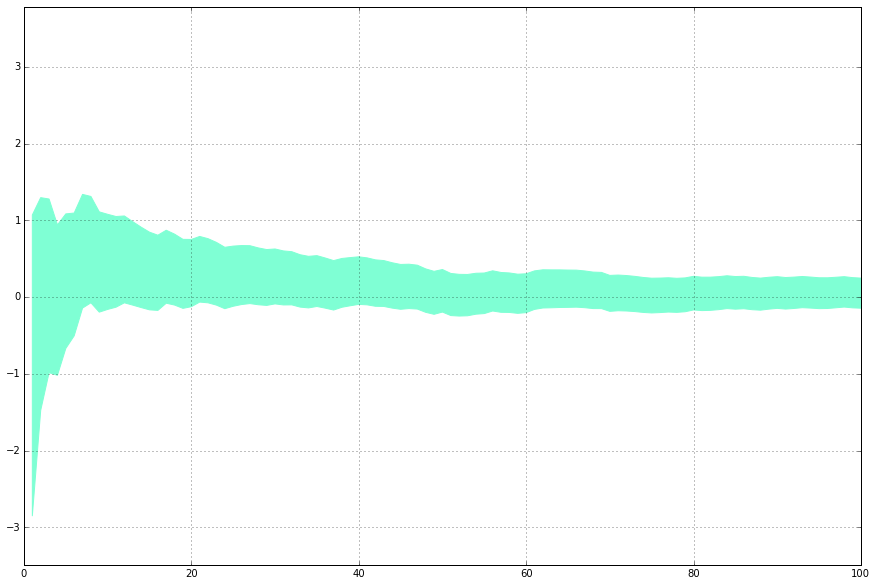

In [33]:
level = sps.norm.ppf( (1 - gamma) / 2)
mean = sample.cumsum() / np.arange(1, n + 1)

build_graphs(mean - level / np.arange(1, n + 1)**0.5, mean + level / 
             np.arange(1, n + 1)**0.5)


## b) $\sigma^2$ при известном $a$

$\mathbb{P}\left(  \frac{\sum\limits_{i=1}^n (X_i-a)^2}{\chi^2_{\frac{1+\alpha}{2},n}} \leqslant  \sigma^2 \leqslant \frac{\sum\limits_{i=1}^n (X_i-a)^2}{\chi^2_{\frac{1-\alpha}{2},n}} \right) = \alpha$

$\chi^2_{\alpha,n} — \alpha$ -квантиль распределения $\chi^2(n)$ c n степенями свободы. 

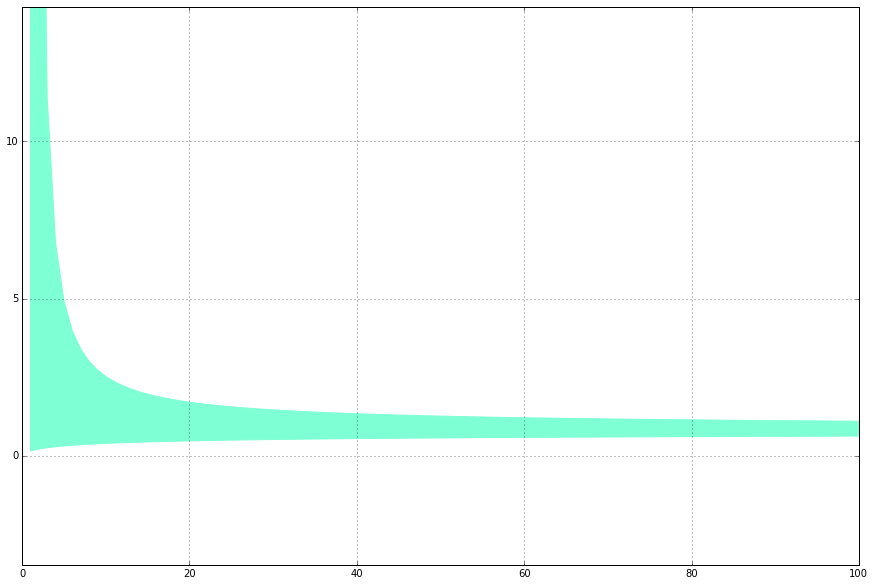

In [34]:
chi1 = sps.chi2.ppf((1 + gamma) / 2, np.arange(1,n+1))
chi2 = sps.chi2.ppf((1 - gamma) / 2, np.arange(1,n+1))
summ = np.mean(sample**2) * np.arange(1, n + 1)

build_graphs(summ / chi1, summ / chi2)

## c) $a$ при неизвестном $\sigma^2$

$\mathbb{P}\left( \bar{X} - t_{1-\frac{\alpha}{2},n-1} \frac{S}{\sqrt{n}} \le a \le \bar{X} + t_{1-\frac{\alpha}{2},n-1} \frac{S}{\sqrt{n}}\right) = 1-\alpha$

S — несмещённое выборочное стандартное отклонение

$t_{\alpha,n-1} — \alpha$-квантили распределения Стьюдента c n-1 степенями свободы



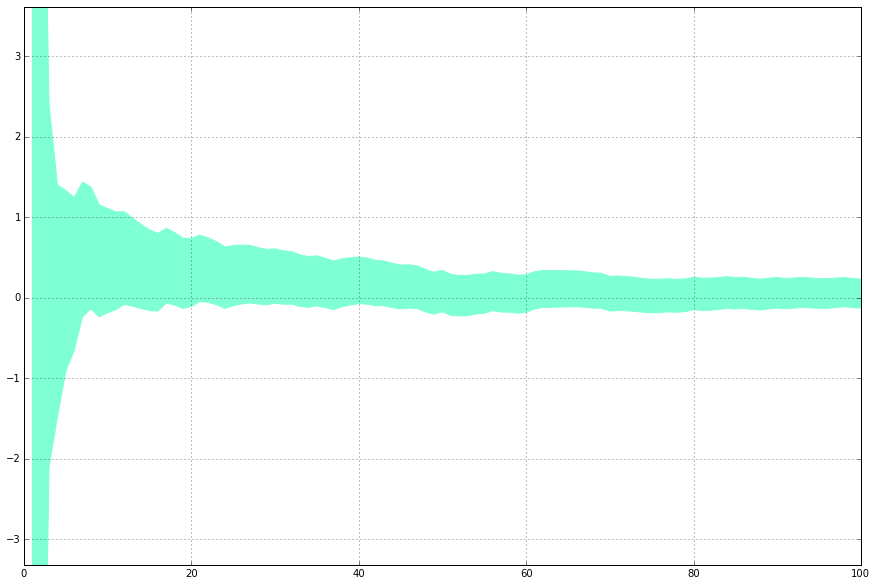

In [35]:
level = sps.t.ppf((1-gamma)/2, np.arange(1,n + 1) - 1) 
level[0] = level[1]
S = math.sqrt(np.mean(sample**2) - np.mean(sample)**2)

mean = sample.cumsum() / np.arange(1, n + 1)

build_graphs(mean - level*S/(np.arange(1, n + 1))**0.5,mean + level*S/
             (np.arange(1, n + 1))**0.5)

## d) $\sigma^2$ при неизвестном $a$

$ \mathbb{P}\left(  \frac{(n-1) S^2}{\chi^2_{\frac{1+\alpha}{2},n-1}} \leqslant \sigma^2 \leqslant\frac{(n-1)S^2}{\chi^2_{\frac{1-\alpha}{2},n-1}} \right) = \alpha$

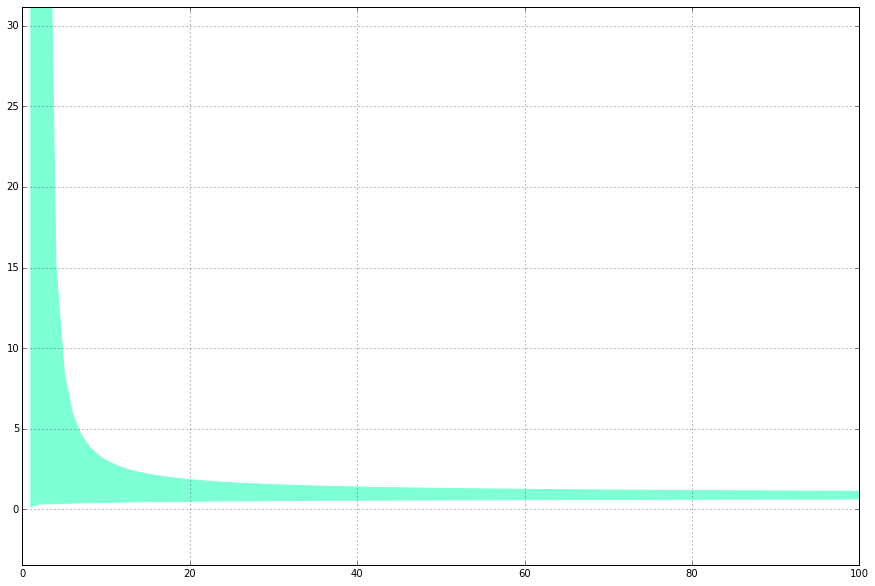

In [36]:
chi1 = sps.chi2.ppf((1 + gamma)/2, np.arange(1, n + 1) - 1)
chi1[0] = chi1[1]
chi2 = sps.chi2.ppf((1 - gamma)/2, np.arange(1, n + 1) - 1)
chi2[0] = chi2[1]

build_graphs(np.arange(1, n + 1)*(S**2)/
             chi1,np.arange(1, n + 1)*(S**2)/chi2)


### e) Доверительная область для $(a, \sigma^2)$

$P(0 < \frac{(\overline{X} - a)^2}{\sigma^2} < \frac{z_1}{n}) = \sqrt{\alpha}$, где $z_1$ - квантиль уровня $\sqrt{\alpha}$ распределения $\chi^2(1)$, 

при этом $\frac{\sqrt{n}(\overline X - a)}{\sigma}$ $\sim$ $N(0, 1)$, а  $\frac{n(\overline X - a)^2}{\sigma^2}$ $\sim$ $\chi^2(1)$


$P(0 < \sigma^2 < \frac{nS^2}{z_2}) = \sqrt{\alpha}$, где $z_2$ - квантиль уровня $1 - \sqrt{\alpha}$ распределения $\chi^2(n - 1)$, 

где $\frac{nS^2}{\sigma^2}$ $\sim$ $\chi^2(n - 1)$


Далее, $\frac{n(\overline X - a)^2}{\sigma^2}$ независим с $\frac{nS^2}{\sigma^2}$ =>


$P(0 < \sigma^2 < \frac{nS^2}{z_2} \land \overline{X} - \sqrt{\frac{S^2z_1}{z_2}} < a < \overline{X} + \sqrt{\frac{S^2z_1}{z_2}}) = \alpha$

строим для n = 100

In [59]:
a1 = np.mean(sample) - (S_2 * sps.chi.ppf(gamma**0.5,1) /
                        sps.chi.ppf(1 - gamma**0.5, n - 1))**0.5
a2 = np.mean(sample) + (S_2 * sps.chi.ppf(gamma**0.5,1) /
                        sps.chi.ppf(1 - gamma**0.5, n -1))**0.5


sigma1 = np.zeros(n)
sigma2 = [n*S_2 / sps.chi.ppf(1 - gamma**0.5,n - 1) for x in grid]


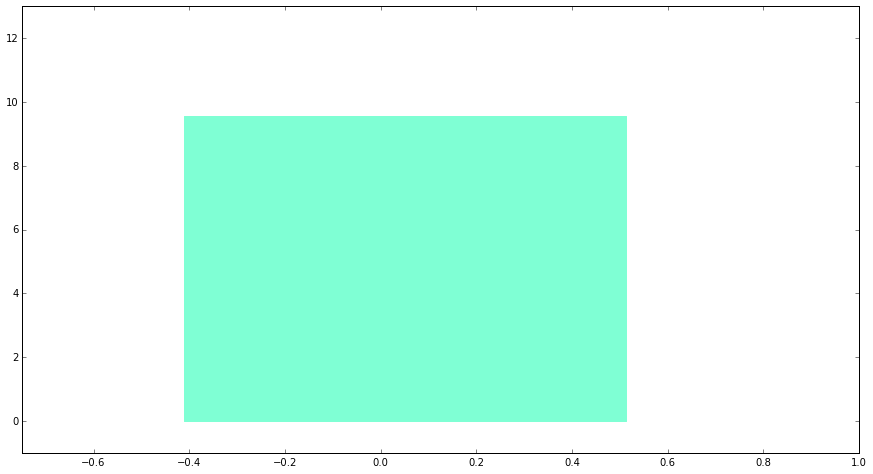

In [62]:
plt.figure(figsize=(15,8))
plt.fill_between(np.linspace(a1, a2, n), sigma1, sigma2, color ='aquamarine')
plt.xlim((-0.75, 1))
plt.ylim((-1, 13))
plt.show()